In [191]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [192]:
df = pd.read_csv("big_dataset.csv")
df.head()


,id,valence,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,happy,sad,angry,relaxed
0,05wIrZSwuaVWhcv5FfqeH0,0.944,0.869,0.0678,109.902,0.0370,0.01160,0.173000,0.596,10,238733,-11.970,1,1,0,0,0
1,4kbj5MwxO1bq9wjT5g9HaA,0.619,0.866,0.2570,128.038,0.0619,0.00701,0.000000,0.578,1,199080,-3.804,1,1,0,0,0
2,32OlwWuMpZ6b0aN2RZOeMS,0.928,0.609,0.0344,114.988,0.0824,0.00801,0.000082,0.856,0,269667,-7.223,1,1,0,0,0
3,6JV2JOEocMgcZxYSZelKcc,0.701,0.830,0.1910,113.030,0.0749,0.01230,0.000000,0.667,0,236002,-5.715,1,1,0,0,0
4,6NPVjNh8Jhru9xOmyQigds,0.962,0.757,0.0886,159.911,0.1530,0.28600,0.000000,0.652,1,233305,-6.819,1,1,0,0,0


In [162]:
df.describe()

,valence,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,happy,sad,angry,relaxed
count,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000,5192.000000
mean,0.438230,0.641140,0.182758,121.462919,0.096158,0.260363,0.053683,0.581375,5.163521,221828.896379,-7.223046,0.650616,0.334553,0.316641,0.251733,0.097072
std,0.238732,0.245445,0.143832,29.667268,0.096288,0.312761,0.191075,0.161398,3.635485,58037.913837,4.431914,0.476821,0.471879,0.465211,0.434051,0.296085
min,0.030400,0.002890,0.021700,47.426000,0.022800,0.000003,0.000000,0.059400,0.000000,31200.000000,-39.053000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242000,0.471000,0.095700,98.016750,0.037700,0.011700,0.000000,0.470000,2.000000,189289.750000,-8.636750,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.414000,0.678000,0.122000,119.997000,0.056300,0.102000,0.000002,0.588000,5.000000,216166.500000,-6.077000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.612000,0.845000,0.228000,140.068000,0.109000,0.445000,0.000407,0.701000,8.000000,246720.250000,-4.446000,1.000000,1.000000,1.000000,1.000000,0.000000
max,0.982000,0.997000,0.961000,208.951000,0.954000,0.996000,0.988000,0.979000,11.000000,599746.000000,1.012000,1.000000,1.000000,1.000000,1.000000,1.000000


In [193]:
df.loc[df['happy'] == 1, 'mood'] = 'happy'
df.loc[df['sad'] == 1, 'mood'] = 'sad'
df.loc[df['angry'] == 1, 'mood'] = 'angry'
df.loc[df['relaxed'] == 1, 'mood'] = 'relaxed'
df.head()

,id,valence,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,happy,sad,angry,relaxed,mood
0,05wIrZSwuaVWhcv5FfqeH0,0.944,0.869,0.0678,109.902,0.0370,0.01160,0.173000,0.596,10,238733,-11.970,1,1,0,0,0,happy
1,4kbj5MwxO1bq9wjT5g9HaA,0.619,0.866,0.2570,128.038,0.0619,0.00701,0.000000,0.578,1,199080,-3.804,1,1,0,0,0,happy
2,32OlwWuMpZ6b0aN2RZOeMS,0.928,0.609,0.0344,114.988,0.0824,0.00801,0.000082,0.856,0,269667,-7.223,1,1,0,0,0,happy
3,6JV2JOEocMgcZxYSZelKcc,0.701,0.830,0.1910,113.030,0.0749,0.01230,0.000000,0.667,0,236002,-5.715,1,1,0,0,0,happy
4,6NPVjNh8Jhru9xOmyQigds,0.962,0.757,0.0886,159.911,0.1530,0.28600,0.000000,0.652,1,233305,-6.819,1,1,0,0,0,happy


In [194]:
col_features = df.columns[1:-5]
print(col_features)

X= MinMaxScaler().fit_transform(df[col_features])

Index(['valence', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'danceability', 'key', 'duration_ms', 'loudness',
       'mode'],
      dtype='object')


In [195]:
#Encodethe categories
Y = df['mood']
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
print(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


target = pd.DataFrame({'mood':df['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

[1 1 1 ... 2 2 2]
4153
1039
4413
779


,mood,encode
3381,angry,0
0,happy,1
4688,relaxed,2
1737,sad,3


In [167]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=12,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [196]:
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

In [197]:
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

Baseline: 73.81% (1.59%)


In [198]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)


C:\Users\Daniela\AppData\Roaming\Python\Python39\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[204  39   3  17]
 [ 36 252   0  31]
 [  3   2  48  34]
 [ 16  57   8 289]]


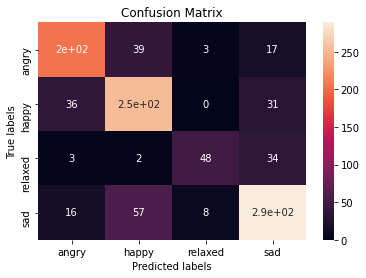

Accuracy Score 0.7632338787295476


In [199]:
cm = confusion_matrix(Y_test,y_preds)
print(cm)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [183]:
#SVM model
X_train,X_test,y_train,y_test = train_test_split(X,encoded_y,test_size=0.15,random_state=15)


In [201]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 8
kfold = model_selection.KFold(n_splits = 10,shuffle=True)
  
# initialize the base classifier
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
  
results = model_selection.cross_val_score(model, X, encoded_y, cv = kfold)
print("accuracy :")
print(results.mean())

accuracy :
0.7858262931673337


In [186]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy: 0.7766367137355584
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       207
           1       0.74      0.80      0.77       236
           2       0.87      0.50      0.63        66
           3       0.77      0.85      0.80       270

    accuracy                           0.78       779
   macro avg       0.80      0.72      0.75       779
weighted avg       0.78      0.78      0.77       779



In [4]:
#Another model using Random Forest
df.head()

,id,valence,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,happy,sad,angry,relaxed
0,05wIrZSwuaVWhcv5FfqeH0,0.944,0.869,0.0678,109.902,0.0370,0.01160,0.173000,0.596,10,238733,-11.970,1,1,0,0,0
1,4kbj5MwxO1bq9wjT5g9HaA,0.619,0.866,0.2570,128.038,0.0619,0.00701,0.000000,0.578,1,199080,-3.804,1,1,0,0,0
2,32OlwWuMpZ6b0aN2RZOeMS,0.928,0.609,0.0344,114.988,0.0824,0.00801,0.000082,0.856,0,269667,-7.223,1,1,0,0,0
3,6JV2JOEocMgcZxYSZelKcc,0.701,0.830,0.1910,113.030,0.0749,0.01230,0.000000,0.667,0,236002,-5.715,1,1,0,0,0
4,6NPVjNh8Jhru9xOmyQigds,0.962,0.757,0.0886,159.911,0.1530,0.28600,0.000000,0.652,1,233305,-6.819,1,1,0,0,0


In [9]:
#Normalise the dataset + leave the moods one hot encoded for this approach
aux_X = MinMaxScaler().fit_transform(df.loc[:, 'valence':'mode'])
df_norm=pd.DataFrame(aux_X)
df_norm.columns=df.columns[1:13]
aux_Y =df.loc[:, 'happy':'relaxed']
df_norm=df_norm.join(aux_Y)
df_norm.head()

,valence,energy,liveness,tempo,speechiness,acousticness,instrumentalness,danceability,key,duration_ms,loudness,mode,happy,sad,angry,relaxed
0,0.960067,0.871242,0.049079,0.386788,0.015249,0.011643,0.175101,0.583515,0.909091,0.365024,0.675977,1.0,1,0,0,0
1,0.618537,0.868224,0.250506,0.499068,0.041989,0.007035,0.000000,0.563941,0.090909,0.295280,0.879795,1.0,1,0,0,0
2,0.943253,0.609701,0.013521,0.418276,0.064003,0.008039,0.000082,0.866246,0.000000,0.419433,0.794459,1.0,1,0,0,0
3,0.704708,0.832011,0.180241,0.406154,0.055949,0.012346,0.000000,0.660722,0.000000,0.360221,0.832098,1.0,1,0,0,0
4,0.978983,0.758578,0.071223,0.696394,0.139820,0.287146,0.000000,0.644411,0.090909,0.355477,0.804543,1.0,1,0,0,0


In [126]:
X = df_norm[col_features]
print(col_features)
col_labels = df_norm.columns[12::]
y = df_norm[col_labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Index(['valence', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness',
       'instrumentalness', 'danceability', 'key', 'duration_ms', 'loudness'],
      dtype='object')


In [143]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,bootstrap=True, oob_score=True, n_jobs=1, random_state=None, verbose=0, warm_start=False,class_weight=None)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [152]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred)
print(cr)

Accuracy: 0.7507218479307026
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       327
           1       0.82      0.80      0.81       357
           2       0.93      0.77      0.84       250
           3       0.95      0.55      0.70       105

   micro avg       0.86      0.75      0.80      1039
   macro avg       0.88      0.72      0.78      1039
weighted avg       0.86      0.75      0.80      1039
 samples avg       0.75      0.75      0.75      1039

C:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
#Calculate feature importance

feature_imp = pd.Series(clf.feature_importances_,index=col_features).sort_values(ascending=False)

feature_imp

energy              0.179402
acousticness        0.163854
valence             0.128634
loudness            0.094806
danceability        0.091308
speechiness         0.079888
duration_ms         0.075606
tempo               0.058104
instrumentalness    0.049898
liveness            0.049718
key                 0.028784
dtype: float64

No handles with labels found to put in legend.


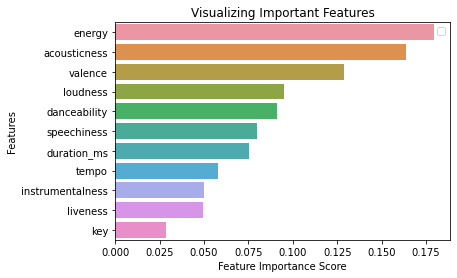

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [101]:
#Exclude the unimportant features
X = df_norm[['energy','acousticness','valence','danceability','loudness','speechiness','duration_ms','tempo','instrumentalness']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) # 70% training and 30% test


In [103]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7564966313763234


ValueError: y should be a 1d array, got an array of shape (4153, 4) instead.

In [154]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
print("Score: ", score)

ValueError: y should be a 1d array, got an array of shape (4153, 4) instead.